In [ ]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.layers.core import Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
def define_model_base():
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend()
    pyplot.show()
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend()
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness(define_model):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY))
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
    # entry point, run the test harness
    # run_test_harness()

Hyperparameters: 

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.001)
- Numbers of layers
- Conv2D: kernal sliding windows (3,3), and 32 filters
- MaxPooling2D: (2, 2) is the pool size
- Dense(128, activation='relu'): the number of neurons or units
- Adam(learning_rate=0.001): learning_rate


Note: The code model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) is adding a convolutional layer to a deep learning model in the Keras library.

In this line of code:

Conv2D is the class for creating a 2D convolutional layer.
The first argument 32 is the number of filters, which determine the depth of the output.
The second argument (3, 3) is the kernel size, which is the size of the sliding window that is applied to the input to compute the dot product.
The third argument 'relu' is the activation function, which is used to introduce non-linearity in the model. In this case, the ReLU (Rectified Linear Unit) activation function is used.
The fourth argument input_shape=(32, 32, 3) is the shape of the input data. The input shape is specified as a tuple of integers. In this case, the input is a 32x32 image with 3 color channels (RGB).

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 1.5641 - accuracy: 0.4272 - val_loss: 1.2593 - val_accuracy: 0.5470
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.1579 - accuracy: 0.5897 - val_loss: 1.1111 - val_accuracy: 0.6183
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9582 - accuracy: 0.6653 - val_loss: 0.9776 - val_accuracy: 0.6590
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.8342 - accuracy: 0.7074 - val_loss: 0.8881 - val_accuracy: 0.6907
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7374 - accuracy: 0.7428 - val_loss: 0.8738 - val_accuracy: 0.6950
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6583 - accuracy: 0.7694 - val_loss: 0.7820 - val_accuracy: 0.7289
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5905 - accuracy: 0.7930 - val_loss: 0.8067 - val_accuracy: 0.7246
Epoch 

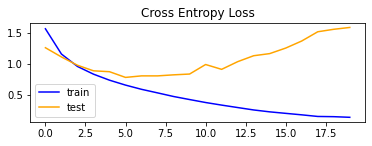

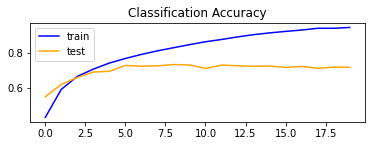

In [ ]:
run_test_harness(define_model_base)

Traning data has a high classification accuracy while testing data has a low accuracy and increasing loss, the model seems to be overfitting. 

In [ ]:
def define_model_initializer():
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 1.4643 - accuracy: 0.4731 - val_loss: 1.2107 - val_accuracy: 0.5722
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 1.0640 - accuracy: 0.6258 - val_loss: 1.0281 - val_accuracy: 0.6467
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8760 - accuracy: 0.6954 - val_loss: 0.9011 - val_accuracy: 0.6892
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7446 - accuracy: 0.7401 - val_loss: 0.8386 - val_accuracy: 0.7156
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6393 - accuracy: 0.7770 - val_loss: 0.8168 - val_accuracy: 0.7293
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5518 - accuracy: 0.8074 - val_loss: 0.8513 - val_accuracy: 0.7189
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.4733 - accuracy: 0.8339 - val_loss: 0.8763 - val_accuracy: 0.7217
Epoch 

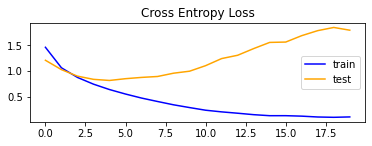

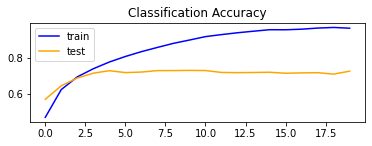

In [ ]:
run_test_harness(define_model_initializer)

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2325 - accuracy: 0.5672 - val_loss: 1.1164 - val_accuracy: 0.6022
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8359 - accuracy: 0.7089 - val_loss: 1.0044 - val_accuracy: 0.6430
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6816 - accuracy: 0.7637 - val_loss: 0.8488 - val_accuracy: 0.7140
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5717 - accuracy: 0.7991 - val_loss: 0.7755 - val_accuracy: 0.7355
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.4783 - accuracy: 0.8337 - val_loss: 0.8289 - val_accuracy: 0.7258
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.3972 - accuracy: 0.8621 - val_loss: 0.8000 - val_accuracy: 0.7454
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.3226 - accuracy: 0.8889 - val_loss: 0.8287 - val_accuracy: 0.7448
Epoch 

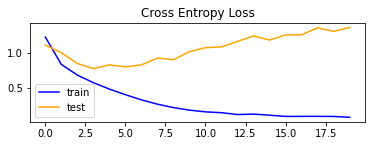

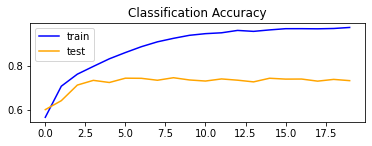

In [ ]:
def define_model_batch_norm():
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

run_test_harness(define_model_batch_norm)    

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 1.3918 - accuracy: 0.5131 - val_loss: 1.1890 - val_accuracy: 0.5815
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9610 - accuracy: 0.6636 - val_loss: 0.9163 - val_accuracy: 0.6779
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8029 - accuracy: 0.7204 - val_loss: 0.9668 - val_accuracy: 0.6710
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7150 - accuracy: 0.7513 - val_loss: 0.8293 - val_accuracy: 0.7233
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.6447 - accuracy: 0.7763 - val_loss: 0.8800 - val_accuracy: 0.7042
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5897 - accuracy: 0.7951 - val_loss: 0.8473 - val_accuracy: 0.7106
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5368 - accuracy: 0.8126 - val_loss: 0.7187 - val_accuracy: 0.7563
Epoch 

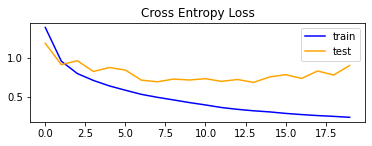

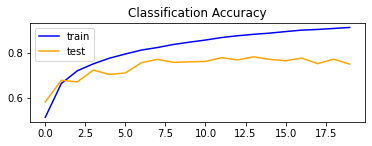

In [ ]:
def define_model_try1():
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25)) # add dropout layer

    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # compile model
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

run_test_harness(define_model_try1)    



In [ ]:
def define_model_try2(learning_rate, dropout_rate):
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate)) # add dropout layer

    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # compile model
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Define the parameter grid for grid search
param_grid = {'learning_rate': [0.001, 0.01, 0.1],
              'dropout_rate': [0.1, 0.2, 0.3]
             }

model = KerasClassifier(build_fn=define_model_try2)
# model = define_model_try2(learning_rate=0.001, dropout_rate=0.1) #create an instance of the model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
grid_search.fit(trainX, trainY)

print('Best parameters found: ', grid_search.best_params_)


<ipython-input-26-4ea7ef9bb777>:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model_try2)


1563/1563 [==============================] - 11s 6ms/step - loss: 1.3237 - accuracy: 0.5335
Best parameters found:  {'dropout_rate': 0.1, 'learning_rate': 0.001}


In [ ]:
def define_model_try3(learning_rate = 0.001, dropout_rate= 0.1):
    """ This function defines the model. Most hyperparameters are located here, 
    although you can also consider data preparation to have hyperparameters. 
    Focus on modifying this part.
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='RandomNormal'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate)) # add dropout layer

    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    # compile model
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run_test_harness(define_model_try3)    

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

[I 2023-01-29 04:27:48,246] A new study created in memory with name: no-name-a1174b63-bef9-4200-8df3-92e27c182b2a


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.3087 - accuracy: 0.5375 - val_loss: 1.1381 - val_accuracy: 0.5924
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8975 - accuracy: 0.6861 - val_loss: 0.9467 - val_accuracy: 0.6648
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7427 - accuracy: 0.7398 - val_loss: 0.8139 - val_accuracy: 0.7172
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6440 - accuracy: 0.7754 - val_loss: 0.7922 - val_accuracy: 0.7246
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5637 - accuracy: 0.8027 - val_loss: 0.7371 - val_accuracy: 0.7412
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4926 - accuracy: 0.8270 - val_loss: 0.7375 - val_accuracy: 0.7556
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4331 - accuracy: 0.8476 - val_loss: 0.7272 - val_accuracy: 0.7631
Epoch 

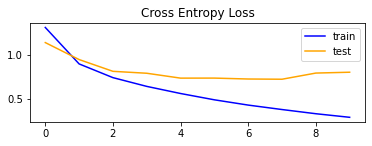

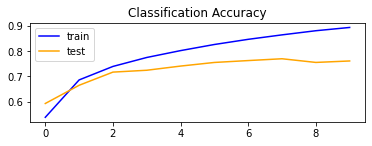

[I 2023-01-29 04:29:14,408] Trial 0 finished with value: -0.7615000009536743 and parameters: {'learning_rate': 0.0582449250086194, 'dropout_rate': 0.21117014719618138}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.2976 - accuracy: 0.5452 - val_loss: 1.0357 - val_accuracy: 0.6439
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9148 - accuracy: 0.6782 - val_loss: 0.9281 - val_accuracy: 0.6818
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7642 - accuracy: 0.7336 - val_loss: 0.8080 - val_accuracy: 0.7177
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6645 - accuracy: 0.7676 - val_loss: 0.8280 - val_accuracy: 0.7166
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5881 - accuracy: 0.7938 - val_loss: 0.9107 - val_accuracy: 0.7092


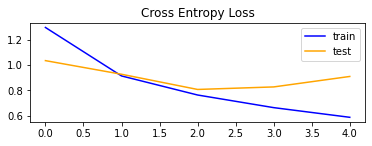

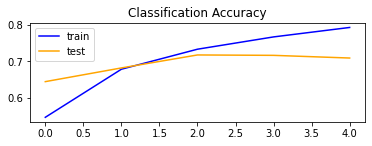

[I 2023-01-29 04:29:59,547] Trial 1 finished with value: -0.7092000246047974 and parameters: {'learning_rate': 0.048275208399434374, 'dropout_rate': 0.3758733562183042}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.3011 - accuracy: 0.5465 - val_loss: 1.0608 - val_accuracy: 0.6274
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8920 - accuracy: 0.6869 - val_loss: 0.9803 - val_accuracy: 0.6494
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7388 - accuracy: 0.7427 - val_loss: 0.8229 - val_accuracy: 0.7085
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6429 - accuracy: 0.7750 - val_loss: 0.8165 - val_accuracy: 0.7180
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5607 - accuracy: 0.8058 - val_loss: 0.7745 - val_accuracy: 0.7367
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4884 - accuracy: 0.8274 - val_loss: 0.8598 - val_accuracy: 0.7170
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4362 - accuracy: 0.8458 - val_loss: 0.7472 - val_accuracy: 0.7501
Epoch 

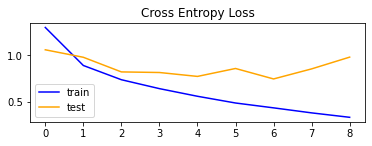

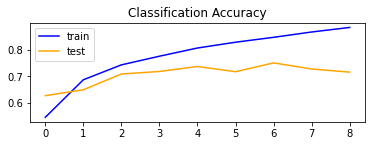

[I 2023-01-29 04:30:59,356] Trial 2 finished with value: -0.715499997138977 and parameters: {'learning_rate': 0.0867242391795267, 'dropout_rate': 0.4278941752142503}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.3039 - accuracy: 0.5434 - val_loss: 1.1116 - val_accuracy: 0.6077
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8979 - accuracy: 0.6831 - val_loss: 0.8653 - val_accuracy: 0.7031
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7469 - accuracy: 0.7380 - val_loss: 0.8154 - val_accuracy: 0.7167
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6442 - accuracy: 0.7748 - val_loss: 0.7907 - val_accuracy: 0.7257
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5629 - accuracy: 0.8034 - val_loss: 0.8882 - val_accuracy: 0.7097
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4988 - accuracy: 0.8259 - val_loss: 0.7608 - val_accuracy: 0.7459
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4384 - accuracy: 0.8474 - val_loss: 0.7987 - val_accuracy: 0.7372
Epoch 

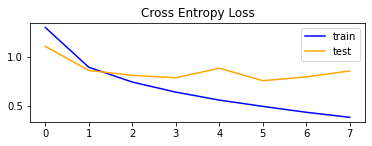

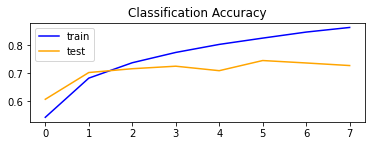

[I 2023-01-29 04:32:25,447] Trial 3 finished with value: -0.7279999852180481 and parameters: {'learning_rate': 0.09961227704477173, 'dropout_rate': 0.6390622206647578}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.2899 - accuracy: 0.5455 - val_loss: 1.0419 - val_accuracy: 0.6299
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8961 - accuracy: 0.6859 - val_loss: 0.9248 - val_accuracy: 0.6743
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7432 - accuracy: 0.7407 - val_loss: 0.7962 - val_accuracy: 0.7245
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6409 - accuracy: 0.7763 - val_loss: 0.8182 - val_accuracy: 0.7226
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5618 - accuracy: 0.8057 - val_loss: 0.7723 - val_accuracy: 0.7353
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4975 - accuracy: 0.8258 - val_loss: 0.7929 - val_accuracy: 0.7422
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4372 - accuracy: 0.8444 - val_loss: 0.7904 - val_accuracy: 0.7457
Epoch 

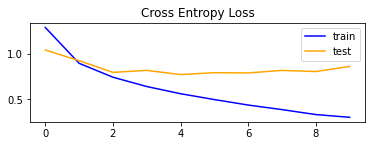

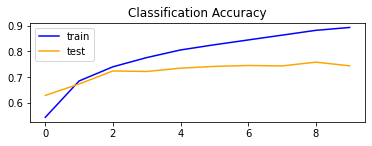

[I 2023-01-29 04:33:30,645] Trial 4 finished with value: -0.7444000244140625 and parameters: {'learning_rate': 0.0409760185158944, 'dropout_rate': 0.6579727193656042}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.3305 - accuracy: 0.5320 - val_loss: 1.1209 - val_accuracy: 0.6147
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9227 - accuracy: 0.6749 - val_loss: 1.0229 - val_accuracy: 0.6571
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7533 - accuracy: 0.7370 - val_loss: 0.8959 - val_accuracy: 0.7025
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6541 - accuracy: 0.7706 - val_loss: 0.8037 - val_accuracy: 0.7218
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5715 - accuracy: 0.7997 - val_loss: 0.7206 - val_accuracy: 0.7554
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5059 - accuracy: 0.8224 - val_loss: 0.8518 - val_accuracy: 0.7208
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4418 - accuracy: 0.8456 - val_loss: 0.7644 - val_accuracy: 0.7479


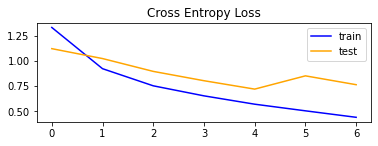

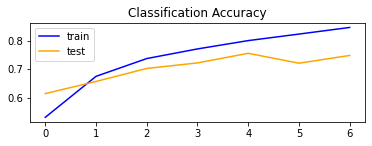

[I 2023-01-29 04:34:56,307] Trial 5 finished with value: -0.7479000091552734 and parameters: {'learning_rate': 0.08347126818964246, 'dropout_rate': 0.46751129959382454}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.3203 - accuracy: 0.5362 - val_loss: 1.1693 - val_accuracy: 0.5942
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8986 - accuracy: 0.6859 - val_loss: 0.9543 - val_accuracy: 0.6738
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7391 - accuracy: 0.7400 - val_loss: 0.8447 - val_accuracy: 0.7049
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6405 - accuracy: 0.7765 - val_loss: 0.9157 - val_accuracy: 0.6876
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5597 - accuracy: 0.8034 - val_loss: 0.7995 - val_accuracy: 0.7319
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4877 - accuracy: 0.8289 - val_loss: 0.8314 - val_accuracy: 0.7311
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4311 - accuracy: 0.8496 - val_loss: 0.7793 - val_accuracy: 0.7590
Epoch 

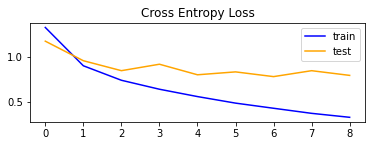

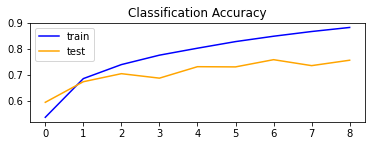

[I 2023-01-29 04:35:56,686] Trial 6 finished with value: -0.7569000124931335 and parameters: {'learning_rate': 0.0851918410471027, 'dropout_rate': 0.45745973135023166}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.2961 - accuracy: 0.5423 - val_loss: 1.0813 - val_accuracy: 0.6258
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9017 - accuracy: 0.6838 - val_loss: 0.9865 - val_accuracy: 0.6510
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7474 - accuracy: 0.7386 - val_loss: 0.8251 - val_accuracy: 0.7164
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6416 - accuracy: 0.7788 - val_loss: 0.8363 - val_accuracy: 0.7153
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5631 - accuracy: 0.8049 - val_loss: 0.7341 - val_accuracy: 0.7488
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4954 - accuracy: 0.8269 - val_loss: 0.7621 - val_accuracy: 0.7459
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4302 - accuracy: 0.8501 - val_loss: 0.7213 - val_accuracy: 0.7661
Epoch 

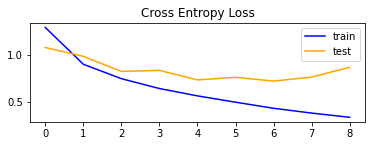

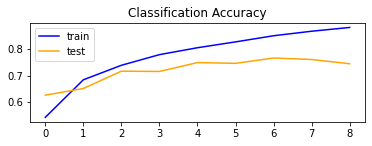

[I 2023-01-29 04:37:22,667] Trial 7 finished with value: -0.7444000244140625 and parameters: {'learning_rate': 0.07601758965621985, 'dropout_rate': 0.5403684327467508}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.2843 - accuracy: 0.5495 - val_loss: 1.0956 - val_accuracy: 0.6170
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8938 - accuracy: 0.6879 - val_loss: 0.9352 - val_accuracy: 0.6780
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7370 - accuracy: 0.7447 - val_loss: 0.9756 - val_accuracy: 0.6626
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6379 - accuracy: 0.7770 - val_loss: 0.7804 - val_accuracy: 0.7335
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5620 - accuracy: 0.8032 - val_loss: 0.7652 - val_accuracy: 0.7427
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4933 - accuracy: 0.8281 - val_loss: 0.7763 - val_accuracy: 0.7483
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4355 - accuracy: 0.8463 - val_loss: 0.7433 - val_accuracy: 0.7589
Epoch 

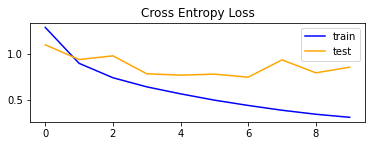

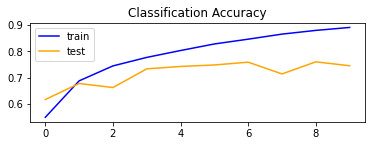

[I 2023-01-29 04:38:48,795] Trial 8 finished with value: -0.7452999949455261 and parameters: {'learning_rate': 0.07493011657783932, 'dropout_rate': 0.49532386931647204}. Best is trial 0 with value: -0.7615000009536743.


Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.2831 - accuracy: 0.5525 - val_loss: 1.0908 - val_accuracy: 0.6214
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8833 - accuracy: 0.6900 - val_loss: 0.8418 - val_accuracy: 0.7083
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7275 - accuracy: 0.7473 - val_loss: 0.8006 - val_accuracy: 0.7253
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.6319 - accuracy: 0.7792 - val_loss: 0.9314 - val_accuracy: 0.6884
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.5527 - accuracy: 0.8062 - val_loss: 0.8445 - val_accuracy: 0.7258
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4872 - accuracy: 0.8293 - val_loss: 0.7464 - val_accuracy: 0.7493
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.4287 - accuracy: 0.8492 - val_loss: 0.7442 - val_accuracy: 0.7567
Epoch 

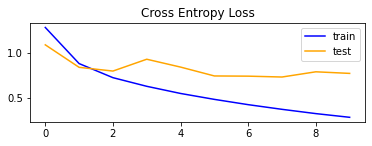

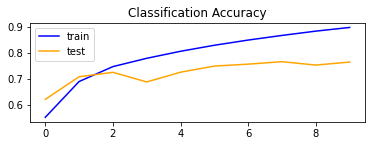

[I 2023-01-29 04:39:56,206] Trial 9 finished with value: -0.7648000121116638 and parameters: {'learning_rate': 0.061077646454029855, 'dropout_rate': 0.43013224031951525}. Best is trial 9 with value: -0.7648000121116638.


Best parameters found: 
{'learning_rate': 0.061077646454029855, 'dropout_rate': 0.43013224031951525}


In [ ]:
def objective(trial):
    # Access the current hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.04, 0.1)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.7)
    
    # Define the model
    model = define_model_try3(learning_rate, dropout_rate)
    
    # Train the model and get the validation loss
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_try3()
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)])
    # evaluate model
    _, val_loss = model.evaluate(testX, testY, verbose=0)    
    summarize_diagnostics(history)
    
    return -history.history['val_accuracy'][-1]

# Create a new study
study = optuna.create_study()

# Conduct the optimization
study.optimize(objective, n_trials=10)

# Print the best parameters
print("Best parameters found: ")
print(study.best_params)